# Regresion lineal Valor de Casas según Atributos (Boston csv)

In [8]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os

In [9]:
os.listdir()

['__pycache__',
 'regresion_lineal_entrenamiento.py',
 'datasets',
 'Untitled.ipynb',
 'Exploracion_regresion_lineal_boston.ipynb',
 'Soluciones_Practico2_RegresionLineal_NotasxHorasEstudio.ipynb',
 '.ipynb_checkpoints',
 'UTNFRP_AA_Práctica 2.pdf',
 'regresion_lineal_boston_sklearn.py']

El dataset tiene 506 registros, de 13 dimensiones


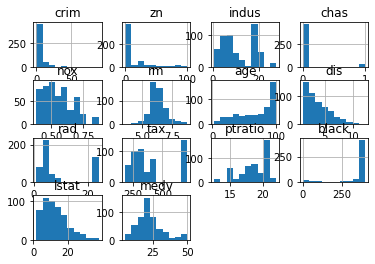

In [11]:
#%% Cargar dataset

data = pd.read_csv("datasets/boston.csv")
x = data.drop('medv', axis=1)
y = data['medv']
n,d = x.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

# visualizar distribución de los features
data.hist();

In [12]:
#%% Normalizar los datos
NORMALIZAR = 1
if (NORMALIZAR):
    scaler = StandardScaler()  
    scaler.fit(x)  
    x = scaler.transform(x)
    
#%% Entrenar modelo de Regresión Lineal
# crea el objeto modelo
modelo= LinearRegression()

#%% entrena
modelo.fit(x, y)
# predice
y_predict= modelo.predict(x)
#coeficientes (parámetros del modelo)
w= modelo.coef_
b= modelo.intercept_

# scores
mse_error= mean_squared_error(y_predict, y)
print("Error cuad. medio: %.2f" % mse_error)
mae_error= mean_absolute_error(y_predict, y)
print("Error abs. medio: %.2f" % mae_error)
r2_score= r2_score(y, y_predict)
print("r2_score: %.2f" % r2_score)



Error cuad. medio: 21.89
Error abs. medio: 3.27
r2_score: 0.74


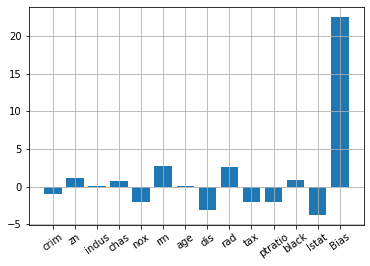

In [13]:
#%% plot coeficientes
plt.figure()
plt.bar(range(d+1), np.concatenate((w,[b])))
labels= data.columns.values; labels[-1]= 'Bias'
plt.xticks(range(w.shape[0]+1), labels, rotation=35)
plt.grid()


(Text(0.5, 0, 'valores reales'), Text(0, 0.5, 'Valores predichos'))

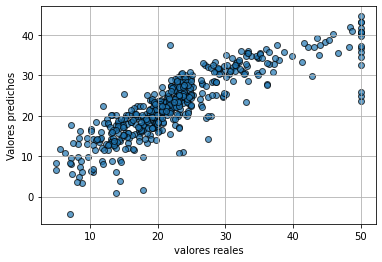

In [14]:
#%% Plot valores esperados vs valores predichos
plt.figure()
plt.scatter(y, y_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.xlabel("valores reales"), plt.ylabel("Valores predichos")

# Sin normalizacion

El data2set tiene 506 registros, de 13 dimensiones


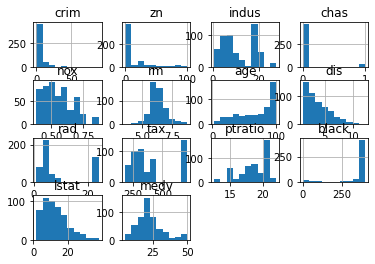

In [22]:
#%% Cargar data2set

data2 = pd.read_csv("datasets/boston.csv")
x = data2.drop('medv', axis=1)
y = data2['medv']
n,d = x.shape
print("El data2set tiene %d registros, de %d dimensiones" %(n, d))

# visualizar distribución de los features
data2.hist();

In [23]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [26]:
#%% Normalizar los datos
NORMALIZAR = 0
if (NORMALIZAR):
    scaler = StandardScaler()  
    scaler.fit(x)  
    x = scaler.transform(x)
    
#%% Entrenar modelo de Regresión Lineal
# crea el objeto modelo
modelo= LinearRegression()

#%% entrena
modelo.fit(x, y)
# predice
y_predict= modelo.predict(x)
#coeficientes (parámetros del modelo)
w= modelo.coef_
b= modelo.intercept_

# scores
mse_error= mean_squared_error(y_predict, y)
print("Error cuad. medio: %.2f" % mse_error)
mae_error= mean_absolute_error(y_predict, y)
print("Error abs. medio: %.2f" % mae_error)
# r2_score= r2_score(y, y_predict)
# print("r2_score: %.2f" % r2_score)



Error cuad. medio: 21.89
Error abs. medio: 3.27


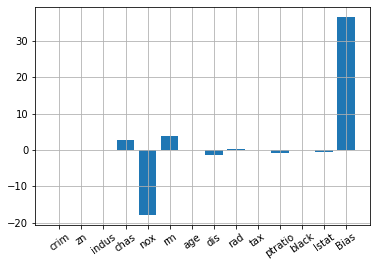

In [27]:
#%% plot coeficientes
plt.figure()
plt.bar(range(d+1), np.concatenate((w,[b])))
labels= data.columns.values; labels[-1]= 'Bias'
plt.xticks(range(w.shape[0]+1), labels, rotation=35)
plt.grid()


(Text(0.5, 0, 'valores reales'), Text(0, 0.5, 'Valores predichos'))

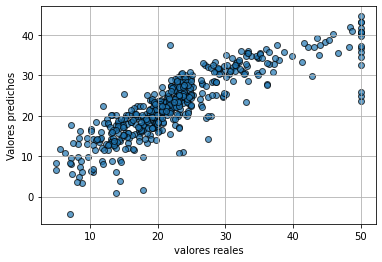

In [28]:
#%% Plot valores esperados vs valores predichos
plt.figure()
plt.scatter(y, y_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.xlabel("valores reales"), plt.ylabel("Valores predichos")